In [2]:
import random

# Sheet 2

## Properties of Sorting Algorithms

a) `:=` means 'defined as':

   * `a < b := not ( b <= a)`
   * `a > b := b < a` (utilize the definition above)
   * `a >= b := b <= a`
   * `a == b := (a <= b) and (b <= a)`
   * `a != b := not (a == b)`  (again utlizing the previous definiton)

b) The following $N - 1$ tests are sufficient:

   ```
   1) a[0] <= a[1], 
   2) a[1] <= a[2], 
   ...
   N-1) a[N-2] <= a[N-1]
   ```

   **Proof**: assume the previous $N - 1$ have passed. Let $i\in [0..N-2]$ and $j \in [i+1..N-1]$ be arbitrary indices.  

   Since the ordering is total, transitivity holds. Specifically having `a[i] <= a[i + 1]` and `a[i + 1] <= a[i + 2]`
   we can deduce by transitivity that `a[i] <= a[i + 2]`. Now having this result and the condition that `a[i+2] <= a[i+3]`
   we can again deduce by transitivity that `a[i] <= a[i + 3]`
   
   Applying such a transitivity chain $j - i$ times we will obtain `a[i] <= a[j]`. 
   Since $i$ and $j$ were arbitrary, s.t. $i < j$, this concludes our proof. 

c) The usual versions of `insertion_sort()` and `quick_sort()`, without counting are given as:

```python
def insertion_sort(a) :
   N = len(a)
   # i = 0
   # sorted(a[0..i])
   for i in range(N):
      k = i + 1
      while k > 0 :
         if a[k] < a[k-1]: a[k], a[k-1] = a[k-1], a[k]
         else: break
         k -= 1

# partition function for quicksort  
def partition(a, l, r):  # l, r are left and right boundaries (inclusive) of a
   p = random.randint(l, r) # choose a random index
   a[p], a[r] = a[r], a[p] # exchange the right-most element with the one at random index
   pivot = a[r] 
   i = l
   k = r - 1
   while True:
      while i < r and a[i] <= pivot: i += 1 # increment until found a misplaced element
      while k > l and a[k] >= pivot: k -= 1 # decrement until found a misplaced element
      if i < k : a[i], a[k] = a[k], a[i]
      else : break
   a[i], a[r] = a[r], a[i] # bring pivot to the correct position
   return i # so that recursive calls now where the partitions are 

# implementation of quicksort with arbitrary array boundaries
def quick_sort_impl(a, l, r):
   if r <= l: return # no return argument since in-place
   i = partition(a, l, r)
   quick_sort_impl(a, l, i-1)
   quick_sort_impl(a, i+1, r)

# the clean user interface
def quick_sort(a) :
   quick_sort_impl(a, 0, len(a) - 1)
```

   We modify them slightly to return the number of comparisons:

In [3]:

def insertion_sort(a) :
    N = len(a)
    count = 0
    # i = 1
    # sorted(a[0..i-1])
    for i in range(1, N):
        k = i
        while k > 0 :
            if a[k] < a[k-1]: 
                a[k], a[k-1] = a[k-1], a[k]
                count += 1
            else: 
                count += 1
                break
            k -= 1
    return count

In [4]:

def partition(a, l, r):  # l, r are left and right boundaries (inclusive) of a
    count = 0
    p = random.randint(l, r)
    a[p], a[r] = a[r], a[p]
    pivot = a[r]
    i = l
    k = r - 1
    while True:
        while i < r and a[i] <= pivot: 
            i += 1 # increment until found a misplaced element
            count += 1
        while k > l and a[k] >= pivot: 
            k -= 1 # decrement until found a misplaced element
            count += 1
        if i < k : a[i], a[k] = a[k], a[i]
        else : break
    a[i], a[r] = a[r], a[i] # bring pivot to the correct position
    return i, count # so that recursive calls now where the partitions are 

# implementation of quicksort with arbitrary array boundaries
def quick_sort_impl(a, l, r):
    if r <= l: return 0# no return argument since in-place
    i, count = partition(a, l, r)
    count += quick_sort_impl(a, l, i-1)
    count += quick_sort_impl(a, i+1, r)
    return count

# the clean user interface
def quick_sort(a) :
    return quick_sort_impl(a, 0, len(a) - 1)

Now we write a simple script that aggregates the counts of sorts in lists, and subsequently plot the lists:

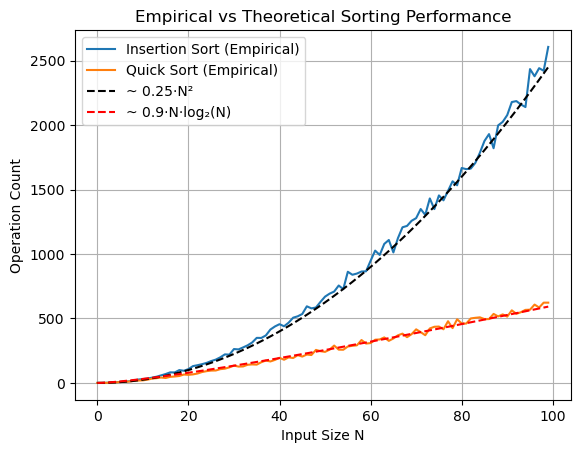

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_counts(sorting_function, shuffle = True, MAX = 100):
    counts_array = []
    for N in range(MAX):
        count = 0 
        for i in range(5):
            a = list(range(N))
            if shuffle :
                random.shuffle(a)
            count += sorting_function(a)
        count /= 5
        counts_array.append(count)
    return counts_array

insertion_counts = create_counts(insertion_sort)

quick_counts = create_counts(quick_sort)

# insertion_sorted_counts = create_counts(insertion_sort, False)

# --- Prepare input sizes ---
N_values = np.arange(100)

# --- Theoretical curves with estimated constants ---
d1, e1, f1 = 0.25, 0, 0  # Insertion Sort: Quadratic
d2, e2, f2 = 0.9, 0, 0   # Quick Sort: N log N

insertion_theoretical = d1 * N_values**2 + e1 * N_values + f1
quick_theoretical = d2 * N_values * np.log2(N_values + 1) + e2 * N_values + f2

# --- Plot everything ---
plt.plot(insertion_counts, label="Insertion Sort (Empirical)")
plt.plot(quick_counts, label="Quick Sort (Empirical)")
# plt.plot(insertion_sorted_counts, label="Insertion Sort (Sorted Input)")

plt.plot(N_values, insertion_theoretical, 'k--', label="~ 0.25·N²")  # Dashed black
plt.plot(N_values, quick_theoretical, 'r--', label="~ 0.9·N·log₂(N)")  # Dashed red

plt.xlabel("Input Size N")
plt.ylabel("Operation Count")
plt.title("Empirical vs Theoretical Sorting Performance")
plt.legend()
plt.grid(True)
plt.show()

We see that insertion sort is well approximated by the function $0.25\cdot N^2$ and quick sort by $0.9\cdot N\cdot\log_2{N}$, confirming our theoretical expectations. 

Next we do the same for already sorted arrays:

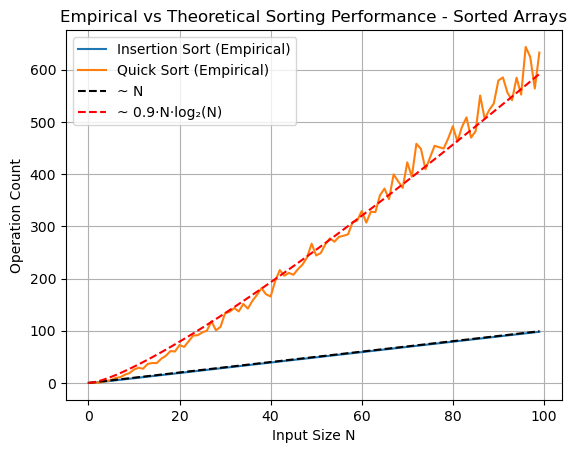

In [11]:
insertion_counts = create_counts(insertion_sort, False)
quick_counts = create_counts(quick_sort, False)

# --- Prepare input sizes ---
N_values = np.arange(100)

# --- Theoretical curves with estimated constants ---
d1, e1 = 1, 0  # Insertion Sort: Quadratic
d2, e2, f2 = 0.9, 0, 0   # Quick Sort: N log N

# insertion_theoretical = d1 * N_values**2 + e1 * N_values + f1
insertion_theoretical = d1 * N_values + e1
quick_theoretical = d2 * N_values * np.log2(N_values + 1) + e2 * N_values + f2

# --- Plot everything ---
plt.plot(insertion_counts, label="Insertion Sort (Empirical)")
plt.plot(quick_counts, label="Quick Sort (Empirical)")
# plt.plot(insertion_sorted_counts, label="Insertion Sort (Sorted Input)")

plt.plot(N_values, insertion_theoretical, 'k--', label="~ N")  # Dashed black
plt.plot(N_values, quick_theoretical, 'r--', label="~ 0.9·N·log₂(N)")  # Dashed red

plt.xlabel("Input Size N")
plt.ylabel("Operation Count")
plt.title("Empirical vs Theoretical Sorting Performance - Sorted Arrays")
plt.legend()
plt.grid(True)
plt.show()

Here we see that insertion sort is linear while quicksort is still $\mathcal{O}N\log(N)$, approximated by the same function from previous output. Thus insertion sort outperforms quicksort for already sorted arrays.

Next we compare how quicksort works on already sorted arrays, if the pivot is not randomly chosen, but always chosen as the right-most element - the naive version.

We first define this naive quick sort version:

In [7]:
def partition2(a, l, r):  # l, r are left and right boundaries (inclusive) of a
    count = 0
    pivot = a[r]
    i = l
    k = r - 1
    while True:
        while i < r and a[i] <= pivot: 
            i += 1 # increment until found a misplaced element
            count += 1
        while k > l and a[k] >= pivot: 
            k -= 1 # decrement until found a misplaced element
            count += 1
        if i < k : a[i], a[k] = a[k], a[i]
        else : break
    a[i], a[r] = a[r], a[i] # bring pivot to the correct position
    return i, count # so that recursive calls now where the partitions are 

# implementation of quicksort with arbitrary array boundaries
def quick_sort_impl2(a, l, r):
    if r <= l: return 0# no return argument since in-place
    i, count = partition2(a, l, r)
    count += quick_sort_impl2(a, l, i-1)
    count += quick_sort_impl2(a, i+1, r)
    return count

# the clean user interface
def quick_sort2(a) :
    return quick_sort_impl2(a, 0, len(a) - 1)

Next we perform the same experiments from before and plot the results:

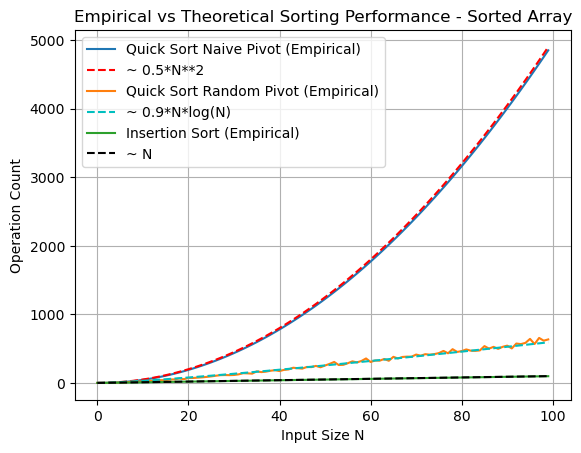

In [12]:
insertion_counts = create_counts(insertion_sort, False)

quick2_counts = create_counts(quick_sort2, False)

quick_counts = create_counts(quick_sort, False)

# --- Prepare input sizes ---
N_values = np.arange(100)

# --- Theoretical curves with estimated constants ---
d1, e1, f1 = 0.5, 0, 0  # Quick Sort Naive Pivot: Quadratic
d2, e2, f2 = 0.9, 0, 0   # Quick Sort: N log N
d3, e3 = 1, 0 # Insetion sort: linear

quick2_theoretical = d1 * N_values**2 + e1 * N_values + f1
quick_theoretical = d2 * N_values * np.log2(N_values + 1) + e2 * N_values + f2
insertion_theoretical = d3 * N_values + e3

# --- Plot everything ---
plt.plot(quick2_counts, label="Quick Sort Naive Pivot (Empirical)")
plt.plot(N_values, quick2_theoretical, 'r--', label="~ 0.5*N**2")  # Dashed red

plt.plot(quick_counts, label="Quick Sort Random Pivot (Empirical)")
plt.plot(N_values, quick_theoretical, 'c--', label="~ 0.9*N*log(N)")  # Dashed red

plt.plot(insertion_counts, label="Insertion Sort (Empirical)")
plt.plot(N_values, insertion_theoretical, 'k--', label="~ N")  # Dashed black

plt.xlabel("Input Size N")
plt.ylabel("Operation Count")
plt.title("Empirical vs Theoretical Sorting Performance - Sorted Array")
plt.legend()
plt.grid(True)
plt.show()

Here we see that quicksort with naive pivot choice runs quadratically for already sorted arrays,
while insetion sort is linear. Thus insertion sort outperforms naive quicksort in this case.
(random pivot quicksort is still $\mathcal{O}(N\log{N})$)

d) 